## importing libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

### load the data

In [56]:
df=pd.read_csv("Weather_data.csv")
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


## cleaning the data

In [57]:
missing_values=df.isnull().sum()
print("missing values :",missing_values)

missing values : Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [58]:
df[['RainToday','RainTomorrow']]=df[['RainToday','RainTomorrow']].replace({'Yes':1,'No':0})

df['Date'] = pd.to_datetime(df['Date'])
df.head()

C:\Users\yasse\AppData\Local\Temp\ipykernel_9688\329812356.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['RainToday','RainTomorrow']]=df[['RainToday','RainTomorrow']].replace({'Yes':1,'No':0})


,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,1,1
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,1,1
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,1,1
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,1,1
4,2008-02-05,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,1,1


In [59]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df = df.drop(columns=['Date'])
wind_gust_dir_map = {
    'N': 1, 'NE': 2, 'E': 3, 'SE': 4,
    'S': 5, 'SW': 6, 'W': 7, 'NW': 8,
    'NNE': 9, 'ENE': 10, 'ESE': 11, 'SSE': 12,
    'SSW': 13, 'WSW': 14, 'WNW': 15, 'NNW': 16
}

# Replace categorical values with numbers
df['WindGustDir'] = df['WindGustDir'].map(wind_gust_dir_map)
df['WindDir9am'] = df['WindDir9am'].map(wind_gust_dir_map)
df['WindDir3pm'] = df['WindDir3pm'].map(wind_gust_dir_map)

# Ensure no missing values after mapping
df = df.fillna(-1)

## Prepare the Data

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Prepare the target variable
y = df['RainTomorrow']
x = df.drop(columns='RainTomorrow')

# Normalize numerical features
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                      'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                      'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                      'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

scaler = MinMaxScaler()
x[numerical_features] = scaler.fit_transform(x[numerical_features])
x.head()
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Define and Compile the Model

In [61]:
from tensorflow.keras.layers import Dense, Dropout
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create model
model = create_model(x_train.shape[1])

C:\Users\yasse\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## train the model

In [62]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,  # Optional, if you have a validation split
    verbose=1
)

Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5118 - loss: 130.0626 - val_accuracy: 0.7309 - val_loss: 47.8898
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6095 - loss: 44.1582 - val_accuracy: 0.7309 - val_loss: 17.3121
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6225 - loss: 23.5048 - val_accuracy: 0.7309 - val_loss: 6.2098
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5970 - loss: 20.0217 - val_accuracy: 0.2691 - val_loss: 1.6075
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6050 - loss: 14.4269 - val_accuracy: 0.2691 - val_loss: 1.2328
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6092 - loss: 12.4607 - val_accuracy: 0.2691 - val_loss: 1.0234
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6295 - loss: 9.1603 - val_accuracy: 0.2691 - val_loss: 2.5670
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6037 - loss: 7.9029 - val_accuracy: 0.7309 - 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7336 - loss: 0.5790 
Test Loss: 0.5863, Test Accuracy: 0.7267


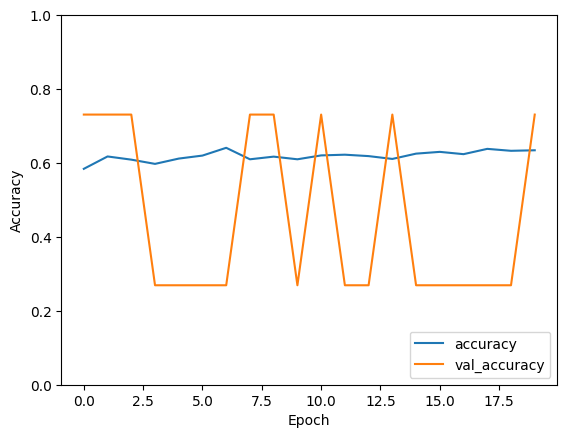

In [63]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Optionally, plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [64]:
X_test_reshaped = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predictions = model.predict(X_test_reshaped)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [65]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert predictions to binary (if necessary)
predictions_binary = (predictions > 0.5).astype(int)  # For binary classification

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_binary))

print("\nClassification Report:")
print(classification_report(y_test, predictions_binary))

Confusion Matrix:
[[476   0]
 [179   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       476
           1       0.00      0.00      0.00       179

    accuracy                           0.73       655
   macro avg       0.36      0.50      0.42       655
weighted avg       0.53      0.73      0.61       655



C:\Users\yasse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yasse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yasse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo